In [1]:
import argparse
import logging
import os
import time
from logging import Logger
from typing import List

import numpy as np

from symb_regression.config import GeneticParams
from symb_regression.core import GeneticProgram
from symb_regression.core.tree import Node
from symb_regression.utils.plotting import (
    plot_evolution_metrics,
    plot_prediction_analysis,
    plot_expression_tree
)
from symb_regression.utils.data_handler import load_data
from symb_regression.utils.logging_config import setup_logger
from symb_regression.utils.metrics import Metrics
import matplotlib.pyplot as plt

In [2]:
def print_section_header(title: str, logger: Logger | None = None):
    if logger is not None:
        logger.info("=" * 50)
        logger.info(f" {title} ".center(50, "="))
        logger.info("=" * 50)
        return
    else:
        print("\n" + "=" * 50)
        print(f" {title} ".center(50, "="))
        print("=" * 50)


def print_section_footer(logger: Logger | None = None):
    if logger is not None:
        logger.info("=" * 50 + "\n")
    else:
        print("=" * 50 + "\n")

In [3]:
def run_symbolic_regression(
    x: np.ndarray,
    y: np.ndarray,
    params: GeneticParams | None = None,
    debug: bool = False,
) -> tuple[Node, List[Metrics]]:
    logger: Logger = logging.getLogger("symb_regression")

    if params is None:
        params = GeneticParams(
            tournament_size=7,
            mutation_prob=0.4,
            crossover_prob=0.8,
            elitism_count=5,
            population_size=1000,
            generations=300,
            max_depth=5,
            min_depth=1,
        )

    if debug:
        logger.debug("Genetic Programming Parameters:")
        for key, value in params.__dict__.items():
            logger.debug(f"{key}: {value}")

    gp = GeneticProgram(params)

    logger.info("Starting evolution...")
    start_time = time.perf_counter()

    try:
        best_solution, history = gp.evolve(x, y)

        end_time = time.perf_counter()
        execution_time = end_time - start_time

        # Use print for better visibility of results
        print_section_header("SYMBOLIC REGRESSION RESULTS")
        print(f"Best Expression Found: {best_solution.to_pretty_string()}")
        print(f"Final Fitness: {gp.calculate_fitness(best_solution, x, y):g}")
        print(f"Execution Time: {execution_time:.2f} seconds")
        print(f"Generations: {len(history)}")
        print_section_footer()

        # Plot the evolution progress

        fig, axs = plt.subplots(1, 2, figsize=(12, 6))
        plot_evolution_metrics(history, ax=axs[0])

        mse, r2 = plot_prediction_analysis(best_solution, x, y, ax=axs[1])

        plt.tight_layout()
        plt.show()

        print("Performance Metrics:")
        print(f"Mean Squared Error: {mse:.6f}")
        print(f"R² Score: {r2:.6f} ({r2*100:.1f}% of variance explained)")

        plot_expression_tree(best_solution)

        return best_solution, history

    except Exception as e:
        logger.error(f"Evolution failed: {e}")
        raise


Data Statistics:
X shape: (50000, 6), Y shape: (50000,)
Number of variables: 6

Variable x0:
  Range: [-5.000, 5.000]
  Mean: -0.001
  Std: 2.881
  Correlation with y: -0.002

Variable x1:
  Range: [-5.000, 4.999]
  Mean: 0.008
  Std: 2.882
  Correlation with y: 0.000

Variable x2:
  Range: [-5.000, 5.000]
  Mean: 0.007
  Std: 2.885
  Correlation with y: 0.008

Variable x3:
  Range: [-5.000, 5.000]
  Mean: 0.005
  Std: 2.893
  Correlation with y: 0.026

Variable x4:
  Range: [-5.000, 5.000]
  Mean: 0.012
  Std: 2.896
  Correlation with y: -0.003

Variable x5:
  Range: [-5.000, 5.000]
  Mean: -0.017
  Std: 2.886
  Correlation with y: 0.812

Target y:
  Range: [-18052.743, 15742.204]
  Mean: -549.715
  Std: 4765.072


Evolution progress:   6%|▋         | 19/300 [00:39<06:49,  1.46s/gen, Best fitness: 0.0000]

No improvement for 10 generations, injecting diversity...


Evolution progress:  10%|█         | 31/300 [01:02<08:54,  1.99s/gen, Best fitness: 0.0000]

No improvement for 10 generations, injecting diversity...


Evolution progress:  14%|█▍        | 42/300 [01:23<08:11,  1.90s/gen, Best fitness: 0.0000]

No improvement for 10 generations, injecting diversity...


Evolution progress:  18%|█▊        | 53/300 [01:46<08:57,  2.17s/gen, Best fitness: 0.0000]

No improvement for 10 generations, injecting diversity...


Evolution progress:  24%|██▍       | 72/300 [02:36<10:43,  2.82s/gen, Best fitness: 0.0000]

No improvement for 10 generations, injecting diversity...


Evolution progress:  28%|██▊       | 83/300 [03:22<16:26,  4.55s/gen, Best fitness: 0.0000]

No improvement for 10 generations, injecting diversity...


Evolution progress:  31%|███▏      | 94/300 [04:13<16:44,  4.88s/gen, Best fitness: 0.0000]

No improvement for 10 generations, injecting diversity...


Evolution progress:  35%|███▌      | 105/300 [05:00<12:27,  3.83s/gen, Best fitness: 0.0000]

No improvement for 10 generations, injecting diversity...


Evolution progress:  39%|███▊      | 116/300 [05:48<15:23,  5.02s/gen, Best fitness: 0.0000]

No improvement for 10 generations, injecting diversity...


Evolution progress:  42%|████▏     | 126/300 [06:21<09:25,  3.25s/gen, Best fitness: 0.0000]c:\Users\rosif\OneDrive\Desktop\Computational-Intelligence\CI-Project\symb_regression\operators\definitions.py:33: RuntimeWarning: invalid value encountered in subtract
  "abs_diff": (lambda x, y: np.abs(x - y), 0.1),
Evolution progress:  42%|████▏     | 127/300 [06:25<09:35,  3.33s/gen, Best fitness: 0.0000]

No improvement for 10 generations, injecting diversity...


Evolution progress:  47%|████▋     | 141/300 [07:11<06:51,  2.59s/gen, Best fitness: 0.0000]

No improvement for 10 generations, injecting diversity...


Evolution progress:  51%|█████     | 152/300 [07:44<08:30,  3.45s/gen, Best fitness: 0.0000]

No improvement for 10 generations, injecting diversity...


Evolution progress:  54%|█████▍    | 163/300 [08:23<08:03,  3.53s/gen, Best fitness: 0.0000]

No improvement for 10 generations, injecting diversity...


Evolution progress:  58%|█████▊    | 174/300 [08:53<05:14,  2.50s/gen, Best fitness: 0.0000]

No improvement for 10 generations, injecting diversity...


Evolution progress:  62%|██████▏   | 185/300 [09:30<06:51,  3.58s/gen, Best fitness: 0.0000]

No improvement for 10 generations, injecting diversity...


Evolution progress:  65%|██████▌   | 196/300 [10:08<06:09,  3.55s/gen, Best fitness: 0.0000]

No improvement for 10 generations, injecting diversity...


Evolution progress:  72%|███████▏  | 215/300 [11:10<05:03,  3.57s/gen, Best fitness: 0.0000]

No improvement for 10 generations, injecting diversity...


Evolution progress:  75%|███████▌  | 226/300 [11:42<03:36,  2.92s/gen, Best fitness: 0.0000]

No improvement for 10 generations, injecting diversity...


Evolution progress:  79%|███████▉  | 237/300 [12:12<02:58,  2.84s/gen, Best fitness: 0.0000]

No improvement for 10 generations, injecting diversity...


Evolution progress:  83%|████████▎ | 248/300 [12:43<02:24,  2.77s/gen, Best fitness: 0.0000]

No improvement for 10 generations, injecting diversity...


Evolution progress:  86%|████████▋ | 259/300 [13:14<01:55,  2.82s/gen, Best fitness: 0.0000]

No improvement for 10 generations, injecting diversity...


Evolution progress:  93%|█████████▎| 278/300 [14:44<02:24,  6.57s/gen, Best fitness: 0.0000]

No improvement for 10 generations, injecting diversity...


Evolution progress: 100%|██████████| 300/300 [18:00<00:00,  3.60s/gen, Best fitness: 0.0000]



========== SYMBOLIC REGRESSION RESULTS ===========
Best Expression Found: abs(x5) ** tan(arcsin(cosh(x1 / x3 abs_diff x4 % x2 abs_diff cos(cos(x3) // x0)))) * x5
Final Fitness: 9.72929e-07
Execution Time: 1080.91 seconds
Generations: 300



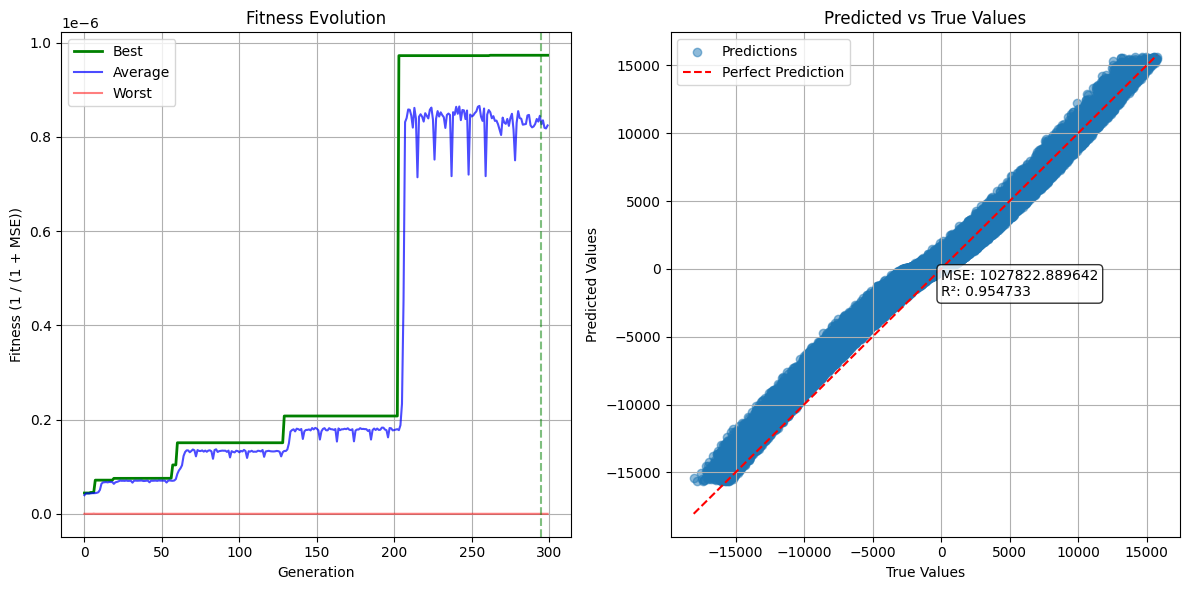

Performance Metrics:
Mean Squared Error: 1027822.889642
R² Score: 0.954733 (95.5% of variance explained)


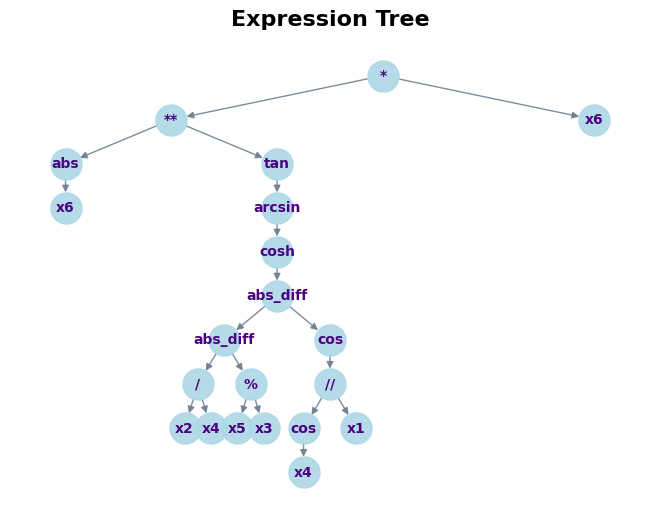

(<symb_regression.core.tree.Node at 0x26162cc2c30>,
 [Metrics(generation=0, execution_time=0.7694857000024058, best_fitness=np.float64(4.40771310060172e-08), avg_fitness=np.float64(3.947285932051347e-08), worst_fitness=np.float64(8.65294778269326e-22), fitness_std=np.float64(1.1827480620276606e-08), best_expression='<symb_regression.core.tree.Node object at 0x00000261673424E0>', population_diversity=1.0, operator_distribution={'Node': 1.0}, avg_tree_size=np.float64(2.755), avg_tree_depth=np.float64(0.91), min_tree_size=1, max_tree_size=28, eval_time=0.7185724999872036, evolution_time=0.7654900000197813),
  Metrics(generation=1, execution_time=1.6486151000135578, best_fitness=np.float64(4.40771310060172e-08), avg_fitness=np.float64(4.341240426120041e-08), worst_fitness=np.float64(2.899731854298757e-20), fitness_std=np.float64(1.519936375450436e-09), best_expression='<symb_regression.core.tree.Node object at 0x00000261674BB410>', population_diversity=1.0, operator_distribution={'Node': 1

In [12]:
# Set random seed for reproducibility
np.random.seed(42)

# Load and process data
PROBLEM_DIR = os.getcwd()
DATA_DIR = os.path.join(PROBLEM_DIR, "data")

x, y = load_data(DATA_DIR, "problem_8")

# Run symbolic regression
run_symbolic_regression(x, y)